In [1]:
import hdfdict
import os
import numpy as np
from matplotlib import pyplot as plt
import cv2
import time

In [2]:
def millis():
    return int(time.time() * 1000)

In [3]:
data_folder = './data/1512427/brainTumorDataPublic_1533-2298/'
images = [data_folder + f for f in os.listdir(data_folder)]

In [4]:
def draw_bbox(mask, image, label):
    mask_y, mask_x = np.where(mask==1)
    minx = mask_x.min()
    maxx = mask_x.max()
    miny = mask_y.min()
    maxy = mask_y.max()
    
    image = cv2.rectangle(image, (minx, miny), (maxx, maxy), (1), 2)
    image = cv2.putText(image, label_dict[label], (minx, miny-10), cv2.FONT_HERSHEY_COMPLEX, 1, (1), 2)
    return image

In [5]:
label_dict = {
    1: 'meningioma',
    2: 'glioma',
    3: 'pituitary'
}

/home/buikhoi/anaconda3/envs/computer_vision/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


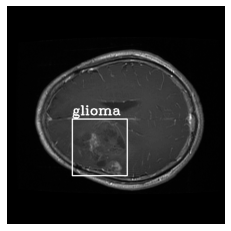

In [6]:
data_file = np.random.choice(images)
data = hdfdict.load(data_file)
image = data['cjdata']['image']
mask = data['cjdata']['tumorMask']
image = image/image.max()
mask = mask/mask.max()
plt.axis('off')
plt.imshow(draw_bbox(mask, image, int(data['cjdata']['label'].max())), cmap='gray')

In [7]:
image.shape

(512, 512)

In [25]:
for img in images:
    data = hdfdict.load(img)
    image = data['cjdata']['image']
    mask = data['cjdata']['tumorMask']
    image = image/image.max() * 255
    mask = mask/mask.max() * 255
    
    file_name = str(millis())
    if np.random.random() > 0.3:
        cv2.imwrite(train_dir + file_name + '.png', image)
        cv2.imwrite(train_dir + file_name + '_mask.png', mask)
    else:
        cv2.imwrite(val_dir + file_name + '.png', image)
        cv2.imwrite(val_dir + file_name + '_mask.png', mask)

In [22]:
train_dir = './training_data/train/'
val_dir = './training_data/val/'